# Here I will use the polynomial model and perform least square fit on ZEMAX data to estimate the center of distortion and distortion coefficient.
## Considering that I have the input/output and predicted data from the model, I can use least square optimization between the predicted coordinates and input to estimate the amount of distortion. In addition, I can use the inverse model (fitting the output to the inverse model) to estimate the inverse distortion parameters.

In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
from skimage import measure
import skimage
import pandas as pd
from scipy import optimize


In [2]:
path = '/home/fatima/Desktop/solar_orbiter_project/ZEMAX/'

In [3]:
f = np.loadtxt(path+'Model')
i = f[:,0]; j = f[:,1]; xfield = f[:,2]; yfield = f[:,3]; R = f[:,4]; xinput = f[:,5]; yinput=f[:,6]; xoutput = f[:,7]; youtput = f[:,8];

### first order Radial distortion with center of distortion is (0,0)


In [4]:
def model_x(params,x_d,y_d,xinput):
     k = params[0]
     r_d = np.sqrt((x_d)**2 + (y_d)**2)
     x_u = x_d*(1+k*(r_d)**2)
     return np.sum((x_u-xinput)**2)
     
def model_y(params,x_d,y_d,yinput):
     k = params[0]
     r_d = np.sqrt((x_d)**2 + (y_d)**2)
     y_u = y_d*(1+k*(r_d)**2)
     return np.sum((y_u-yinput)**2)
         

In [120]:
'''
xinput = np.delete(xinput, [5100,5100])
yinput = np.delete(yinput, [5100,5100])
xoutput = np.delete(xoutput, [5100,5100])
youtput=np.delete(youtput, [5100,5100])
'''

x_d = xoutput
y_d = youtput
p0 = [8.24779678564e-5]
mini_x = optimize.minimize(model_x, p0, args=(x_d,y_d,xinput))

In [123]:
print mini_x.x

[  7.68829928e-05]


In [25]:
x_d = xoutput
y_d = youtput
p0 = [8.24779678564e-05]
mini_y = optimize.minimize(model_y, p0, args=(x_d,y_d,yinput))

In [26]:
print mini_y.x

[  7.79111702e-05]


In [27]:
x_d = xoutput; y_d = youtput; k = mini_y.x
r_d = np.sqrt((x_d)**2 + (y_d)**2)

x_u = x_d*(1+k*(r_d)**2)
y_u = y_d*(1+k*(r_d)**2)

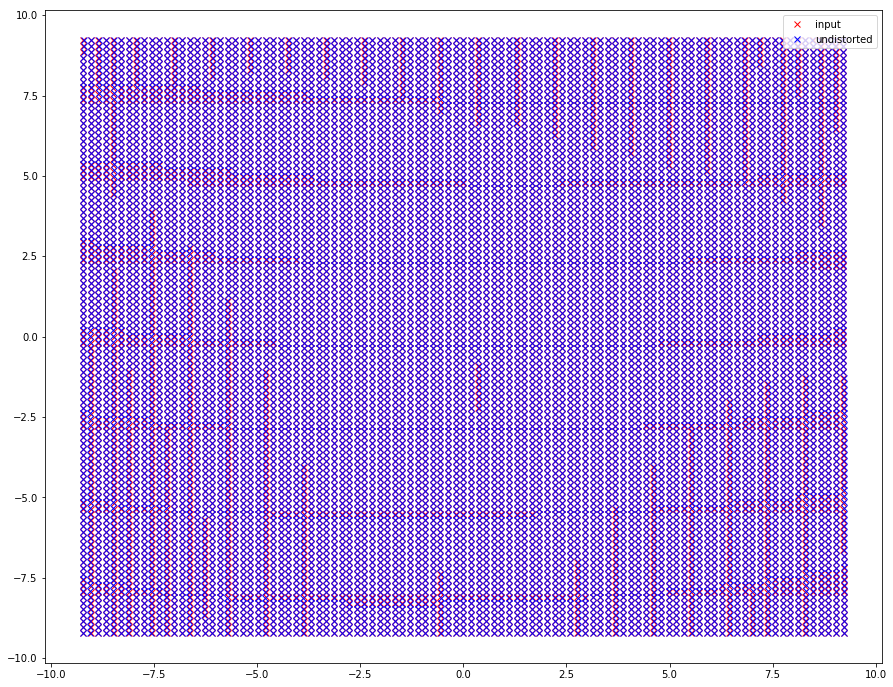

In [28]:
fig = plt.figure(figsize=(15,12))
plt.plot(xinput,yinput,'rx',label='input')
plt.plot(x_u,y_u,'bx',label='undistorted')
plt.legend()

In [29]:
print 100*np.sqrt((1./len(x_u))*np.sum((x_u-x_d)**2+(y_u-y_d)**2))
D=((np.sqrt((x_d)**2+(y_d)**2) - np.sqrt((x_u)**2+(y_u)**2))/np.sqrt((x_u)**2+(y_u)**2))*100
print D.mean()
#chi_sq_x = model_x(mini_x.x,xoutput,youtput,xinput)/(len(xoutput)-len(mini_x.x))
#print chi_sq_x
#chi_sq_y = model_y(mini_y.x,xoutput,youtput,yinput)/(len(xoutput)-len(mini_x.x))
#print chi_sq_y
print np.sum((x_u-xinput)**2)/np.sum(xinput**2)
#Error = np.sqrt((1./len(xinput))*np.sum((x_u-xinput)**2+(y_u-yinput)**2))
#print Error, 'mm'
#print 1000*Error, 'pixels'

5.0810234341
nan
4.43151436622e-07


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


## First and second order radial distoriton, center of distortion fixed

In [127]:
def model_x(params,x_d,y_d,xinput):
     k1 = params[0]
     k2 = params[1]
     r_d = np.sqrt((x_d)**2 + (y_d)**2)
     x_u = x_d*(1+k1*(r_d)**2 + k2*(r_d)**4)
     return np.sum((x_u-xinput)**2)
     
def model_y(params,x_d,y_d,yinput):
     k1 = params[0]
     k2 = params[1]
     r_d = np.sqrt((x_d)**2 + (y_d)**2)
     y_u = y_d*(1+k1*(r_d)**2 + k2*(r_d)**4)
     return np.sum((y_u-yinput)**2)
         

In [128]:
x_d = xoutput
y_d = youtput
p0 = [8.24779678564e-5, 9e-2]
mini_x = optimize.minimize(model_x, p0, args=(x_d,y_d,xinput))

In [131]:
print mini_x.x

[  7.93544102e-05  -2.37078301e-08]


In [132]:
mini_y = optimize.minimize(model_y, p0, args=(x_d,y_d,yinput))

In [133]:
print mini_y.x

[  8.00687546e-05  -1.77272936e-08]


In [135]:
x_d = xoutput; y_d = youtput; k1 = mini_x.x[0]; k2 = mini_x.x[1]
r_d = np.sqrt((x_d)**2 + (y_d)**2)

x_u = x_d*(1+k1*(r_d)**2 + k2*(r_d)**4)
y_u = y_d*(1+k1*(r_d)**2 + k2*(r_d)**4)

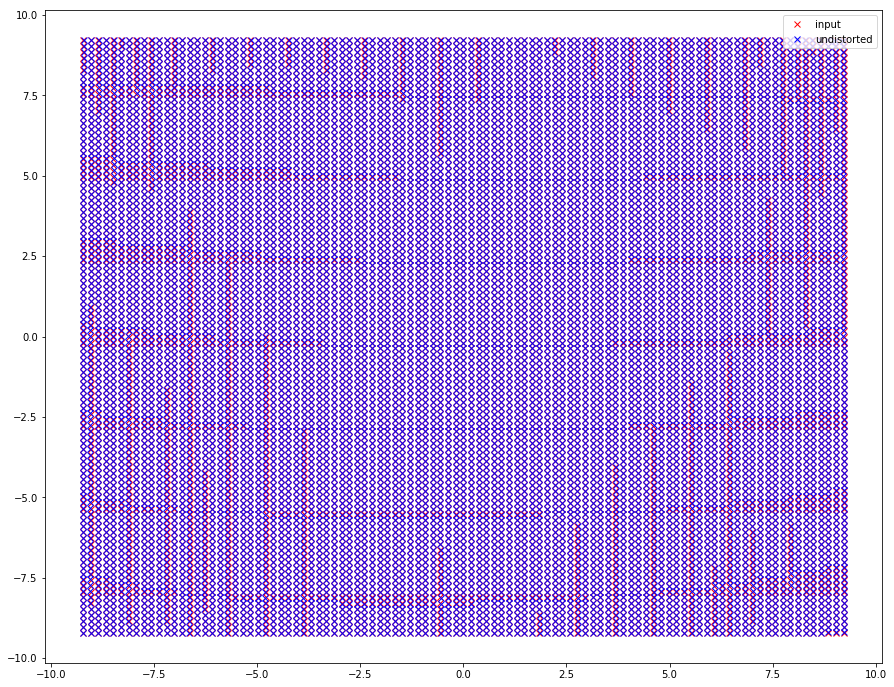

In [136]:
fig = plt.figure(figsize=(15,12))
plt.plot(xinput,yinput,'rx',label='input')
plt.plot(x_u,y_u,'bx',label='undistorted')
plt.legend()

In [137]:
print 100*np.sqrt((1./len(x_u))*np.sum((x_u-x_d)**2+(y_u-y_d)**2))
D=((np.sqrt((x_d)**2+(y_d)**2) - np.sqrt((x_u)**2+(y_u)**2))/np.sqrt((x_u)**2+(y_u)**2))*100
print D.mean()
#chi_sq_x = model_x(mini_x.x,xoutput,youtput,xinput)/(len(xoutput)-len(mini_x.x))
#print chi_sq_x
#chi_sq_y = model_y(mini_y.x,xoutput,youtput,yinput)/(len(xoutput)-len(mini_x.x))
#print chi_sq_y
print np.sum((x_u-xinput)**2)/np.sum(xinput**2)
#Error = np.sqrt((1./len(xinput))*np.sum((x_u-xinput)**2+(y_u-yinput)**2))
#print Error, 'mm'
#print 1000*Error, 'pixels'

5.01418407836
nan
4.62101048347e-07


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


## radial distortion with center of distortion free parameter

In [30]:
def model_x(params,x_d,y_d,xinput):
     k = params[0]
     x_c = params[1]; y_c = params[2]
     r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
     x_u = x_d+(x_d-x_c)*k*(r_d)**2
     return np.sum((x_u-xinput)**2)
     
def model_y(params,x_d,y_d,yinput):
     k = params[0]
     x_c = params[1]; y_c = params[2]
     r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
     y_u = y_d+(y_d-y_c)*k*(r_d)**2
     return np.sum((y_u-yinput)**2)

In [31]:
'''
xinput = np.delete(xinput, [5100,5100])
yinput = np.delete(yinput, [5100,5100])
xoutput = np.delete(xoutput, [5100,5100])
youtput=np.delete(youtput, [5100,5100])
'''
x_d = xoutput
y_d = youtput
p0 = [8.24779678564e-05,0,0]
mini_x = optimize.minimize(model_x, p0, args=(x_d,y_d,xinput))

In [32]:
print mini_x.x

[  7.64536642e-05  -9.12970636e-02  -7.20071824e-01]


In [33]:
mini_y = optimize.minimize(model_y, p0, args=(x_d,y_d,yinput))

In [34]:
print mini_y.x

[  7.77942775e-05  -3.10495963e-01   1.29561292e-01]


In [39]:
#k = mini_x.x[0]; x_c = mini_x.x[1]; y_c = mini_x.x[2]
k = 0.5*(mini_x.x[0]+mini_y.x[0]); x_c = 0.5*( mini_x.x[1]+ mini_y.x[1]); y_c = 0.5*( mini_x.x[2]+ mini_y.x[2])
r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
x_u = x_d+(x_d-x_c)*k*(r_d)**2
y_u = y_d+(y_d-y_c)*k*(r_d)**2
#Error = np.sqrt((1./len(xinput))*np.sum((x_u-xinput)**2+(y_u-yinput)**2))
#print Error, 'mm'
#print 1000*Error, 'pixels'
print np.sum((x_u-xinput)**2)/np.sum(xinput**2)

print 100*np.sqrt((1./len(x_u))*np.sum((x_u-x_d)**2+(y_u-y_d)**2))
D=((np.sqrt((x_d)**2+(y_d)**2) - np.sqrt((x_u)**2+(y_u)**2))/np.sqrt((x_u)**2+(y_u)**2))*100
print D.mean()

'''
y:
7.52001713938e-07
5.10061772951
-0.452929569842
x:
5.76620387306e-08
5.11112323586
-0.451587366772
'''

print k, x_c, y_c

2.26901343058e-07
5.06011863138
-0.44937043051
7.71239708417e-05 -0.200896513342 -0.295255265781


# Radial distortion (the radial component)

In [40]:
'''
xinput = np.delete(xinput, [5100,5100])
yinput = np.delete(yinput, [5100,5100])
xoutput = np.delete(xoutput, [5100,5100])
youtput=np.delete(youtput, [5100,5100])
'''
def model(params,x_d,y_d,xinput,yinput):
    k = params[0]
    r_d = np.sqrt((x_d)**2 + (y_d)**2)
    r_u = r_d*(1+k*(r_d)**2)
    rinput = np.sqrt((xinput)**2 + (yinput)**2)
    return np.sum((r_u-rinput)**2)

In [41]:
x_d = xoutput
y_d = youtput
p0 = [8.24779678564e-05]
mini = optimize.minimize(model, p0, args=(x_d,y_d,xinput,yinput))

In [42]:
print mini.x

[  7.73989696e-05]


In [43]:
k = mini.x
r_d = np.sqrt((x_d)**2 + (y_d)**2)
r_u = r_d*(1+k*(r_d)**2)
rinput = np.sqrt((xinput)**2 + (yinput)**2)

print np.sum((r_u-rinput)**2)/np.sum(rinput**2)



1.16714687895e-07


In [44]:
x_c=y_c=0
x_u = x_d+(x_d-x_c)*k*(r_d)**2
y_u = y_d+(y_d-y_c)*k*(r_d)**2

In [45]:
print 100*np.sqrt((1./len(x_u))*np.sum((x_u-x_d)**2+(y_u-y_d)**2))
D=((np.sqrt((x_d)**2+(y_d)**2) - np.sqrt((x_u)**2+(y_u)**2))/np.sqrt((x_u)**2+(y_u)**2))*100
print D.mean()


5.04761996559
nan


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


## Radial and tangential distortion with center of distortion free parameter

In [138]:
def model_x(params,x_d,y_d,xinput):
     k = params[0]
     P1 = params[1]
     P2 = params[2]
     x_c =0#params[3]
     y_c = 0#params[4]
     r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
     x_u = x_d+(x_d-x_c)*k*(r_d)**2 +P1*(r_d**2+2*(x_d-x_c)**2)+2*P2*(x_d-x_c)*(y_d-y_c)
     return np.sum((x_u-xinput)**2)
     
def model_y(params,x_d,y_d,yinput):
     k = params[0]
     P1 = params[1]
     P2 = params[2]
     x_c = 0#params[3]
     y_c = 0#params[4]
     r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
     y_u = y_d + (y_d - y_c)*k*(r_d)**2 +2*P1*(x_d-x_c)*(y_d-y_c) + P2*(r_d**2+2*(y_d-y_c)**2)
     return np.sum((y_u-yinput)**2)
         

In [139]:
'''
xinput = np.delete(xinput, [5100,5100])
yinput = np.delete(yinput, [5100,5100])
xoutput = np.delete(xoutput, [5100,5100])
youtput=np.delete(youtput, [5100,5100])
'''
x_d = xoutput
y_d = youtput
p0 = [7.24779678564e-04,-10e-02,8e-02]
mini_x = optimize.minimize(model_x, p0, args=(x_d,y_d,xinput))


In [140]:
print mini_x.x

[  7.68925086e-05   6.99797348e-06   5.58690627e-05]


In [143]:
5.58690627e-05 /7.68925086e-05  

0.7265865520220522

In [141]:
mini_y = optimize.minimize(model_y, p0, args=(x_d,y_d,yinput))

In [144]:
print mini_y.x

[  7.79146435e-05   2.45929556e-05  -1.02030646e-05]


In [146]:
1.02030646e-05/7.79146435e-05 

0.1309518229394196

In [99]:
x_d = xoutput; y_d = youtput; x_c = 0; y_c = 0; k = mini_x.x[0]; P1 = mini_x.x[1]; P2 = mini_x.x[2]
r_d = np.sqrt((x_d-x_c)**2 + (y_d-y_c)**2)
x_u = x_d+(x_d-x_c)*k*(r_d)**2 +P1*(r_d**2+2*(x_d-x_c)**2)+2*P2*(x_d-x_c)*(y_d-y_c)
y_u = y_d + (y_d - y_c)*k*(r_d)**2 +2*P1*(x_d-x_c)*(y_d-y_c) + P2*(r_d**2+2*(y_d-y_c)**2)


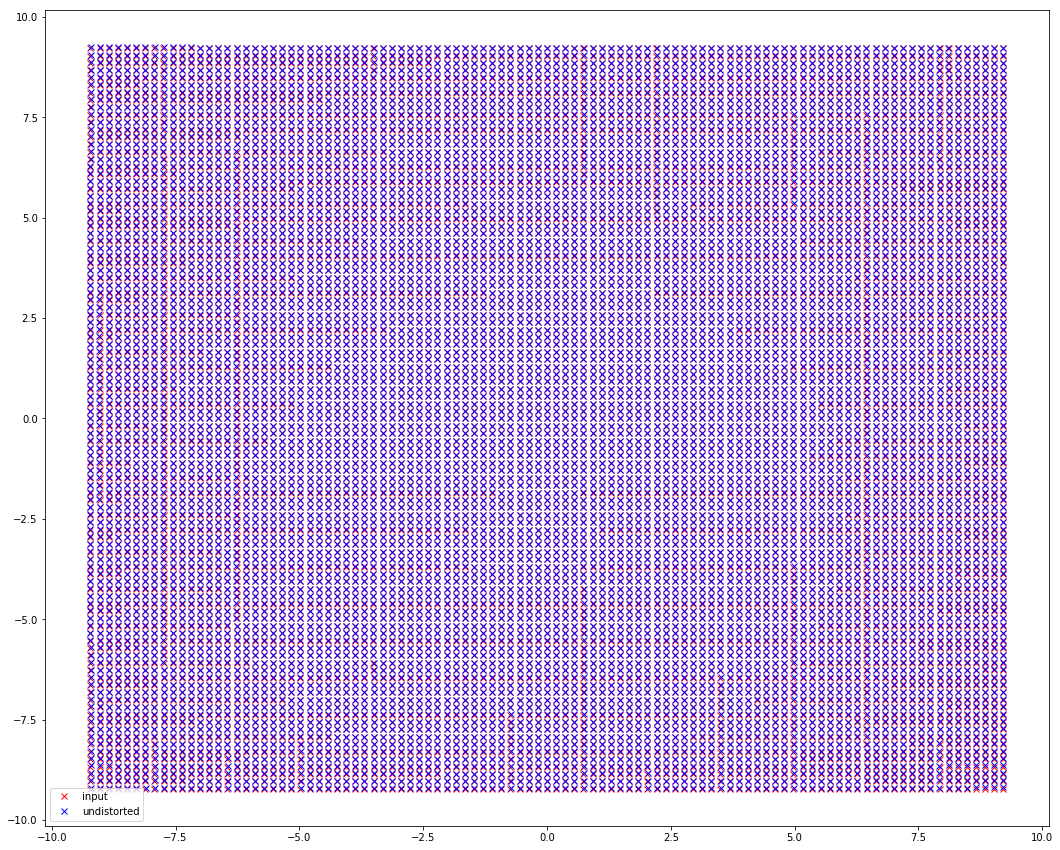

In [100]:
plt.clf()
fig = plt.figure(figsize=(18,15))
plt.plot(xinput,yinput,'rx',label='input')

#plt.plot(xoutput,youtput,'kx',label='output')

plt.plot(x_u,y_u,'bx',label='undistorted')
plt.legend()


In [95]:
print np.sum((x_u-xinput)**2)/np.sum(xinput**2)
print np.sum((y_u-yinput)**2)/np.sum(yinput**2)

print 100*np.sqrt((1./len(x_u))*np.sum((x_u-x_d)**2+(y_u-y_d)**2))
D=((np.sqrt((x_d)**2+(y_d)**2) - np.sqrt((x_u)**2+(y_u)**2))/np.sqrt((x_u)**2+(y_u)**2))*100
print D.mean()


5.2819441655e-08
3.23669128011e-06
5.08552631087
nan


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


## So this tells me that the radial model is valid to compute the undistorted coordinates from the distorted coordinates without the need to take a tangential distortion into account

# Inverse distortion
## Now I will minimize the difference between the output and the distorted using the inverse model

In [114]:
def Inv_x(params,x_u,y_u,xoutput):
  k = params[0]
  x_c = 0
  y_c = 0
  r_u = np.sqrt((x_u-x_c)**2+(y_u-y_c)**2)  
  delta = (1./(3*k))**3 + (r_u/(2*k))**2
  #r_d = np.cbrt((r_u/2*k) + np.sqrt(delta))  + (1./(3*k))*1/(np.cbrt( r_u/(2*k) + np.sqrt(delta) ))
  S = np.cbrt(np.sqrt((r_u/2*k)**2-delta))
  T = (1./3)*np.arctan((-delta)/(r_u/2*k))
  r_d = -S*np.cos(T) + S*np.sqrt(3)*np.sin(T) 
  M = r_d/r_u#(1./(1+k*r_d**2))
  
    
  #r_d = (-1+np.sqrt(1+4*k*r_u**2))/(2*k*r_u)
  x_d = x_c+(x_u-x_c)*M#(r_d/r_u) # (1-k*r_u**2)
  return np.sum((x_d-xoutput)**2)


def Inv_y(params,x_u,y_u,youtput):
  k = params[0]
  x_c =0
  y_c = 0
  r_u = np.sqrt((x_u-x_c)**2+(y_u-y_c)**2) 
  y_d = y_c+(y_u-y_c)*(1-k*r_u**2)
  return np.sum((y_d-youtput)**2)   

In [115]:
x_u = xinput
y_u = yinput

p0 = [8.24779678564e-6]
mini_x = optimize.minimize(Inv_x, p0, args=(x_u,y_u,xoutput))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [116]:
mini_x.x

array([  8.24779679e-06])

In [88]:
mini_y = optimize.minimize(Inv_y, p0, args=(x_u,y_u,youtput))

In [89]:
mini_y.x


array([  7.60502180e-05])

In [112]:
k =  mini_x.x
x_c = 0
y_c = 0
r_u = np.sqrt((x_u-x_c)**2+(y_u-y_c)**2) 
x_d = x_c+(x_u-x_c)*(1-k*r_u**2)
y_d = y_c+(y_u-y_c)*(1-k*r_u**2)


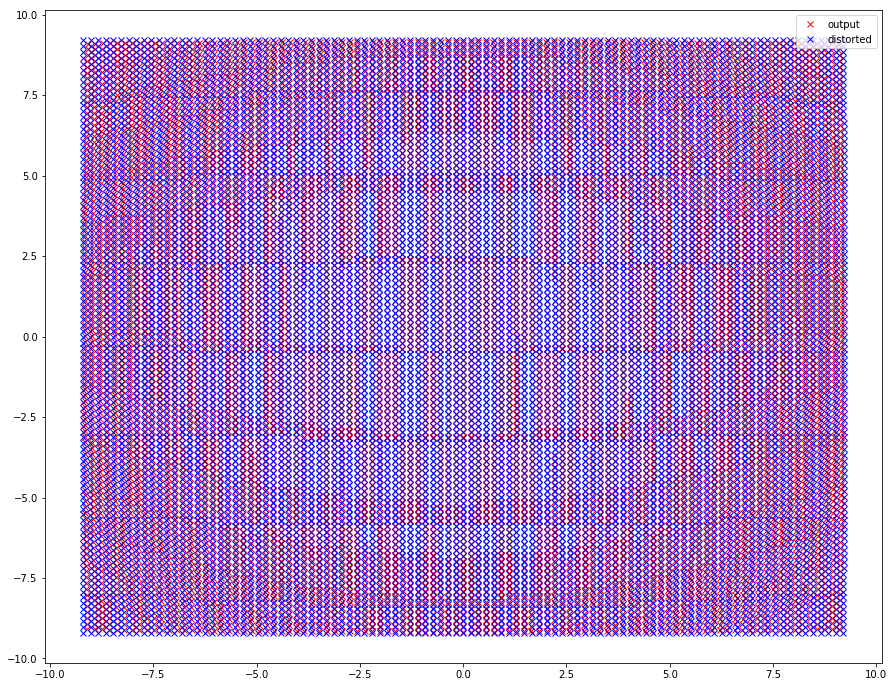

In [113]:
fig = plt.figure(figsize=(15,12))
plt.plot(xoutput,youtput,'rx',label='output')
plt.plot(x_d,y_d,'bx',label='distorted')
plt.legend()

In [92]:
print np.sum((x_d-xoutput)**2)/np.sum(xoutput**2)


4.21638036834e-07


# k and center of distortion free parameters

In [93]:
def Inv_x(params,x_u,y_u,xoutput):
  k = params[0]
  x_c = params[1]
  y_c = params[2]
  r_u = np.sqrt((x_u-x_c)**2+(y_u-y_c)**2) 
  x_d = x_c+(x_u-x_c)*(1-k*r_u**2)
  return np.sum((x_d-xoutput)**2)


def Inv_y(params,x_u,y_u,youtput):
  k = params[0]
  x_c = params[1]
  y_c = params[2]
  r_u = np.sqrt((x_u-x_c)**2+(y_u-y_c)**2) 
  y_d = y_c+(y_u-y_c)*(1-k*r_u**2)
  return np.sum((y_d-youtput)**2)   

# The inverse model gives the same k as the distorted model so it is valid

In [94]:
x_u = xinput
y_u = yinput

p0 = [7e-5,0,0]
mini_x = optimize.minimize(Inv_x, p0, args=(x_u,y_u,xoutput))

In [96]:
mini_x.x

array([  7.46396563e-05,  -8.99464228e-02,  -7.20363065e-01])